# First insight inot the data

The dataset was obtained from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).  
It contains **real clinical data**, anonymized to protect patient privacy, collected from four locations:  
- Cleveland (USA)  
- Hungarian Institute of Cardiology (Hungary)  
- University Hospital, Zurich (Switzerland)  
- Veterans Affairs Medical Center, Long Beach (USA)  

The complete dataset originally included **76 attributes**, but most studies — and this project — focus on a subset of **14 clinically relevant features** (e.g., age, sex, resting blood pressure, serum cholesterol, maximum heart rate, exercise-induced angina, etc.).

The dataset was first introduced in the following publication:  
*Detrano, R. et al., "International application of a new probability algorithm for the diagnosis of coronary artery disease,"* **American Journal of Cardiology**, 64(5):304–310, 1989.

In total, the data represent patient records with a binary target variable indicating the presence or absence of coronary heart disease.

**Let’s take a closer look at the data!**

### First step - imports, environment setup and loading the data.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import math

from ucimlrepo import fetch_ucirepo 

import scipy

In [2]:
%cd C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database
#!pip install pingouin

C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database


In [4]:
import importlib
import functions.base_tools as base_tools
importlib.reload(base_tools)

from functions.base_tools import *

system_info()

=== System Information ===
Python version : 3.12.1
Platform       : Windows 11
Machine        : AMD64
Processor      : Intel64 Family 6 Model 154 Stepping 4, GenuineIntel
CPU cores      : 10 (physical), 12 (logical)
Total RAM      : 7.69 GB
Available RAM  : 1.09 GB
Python path    : C:\Users\piecz\AppData\Local\Programs\Python\Python312\python.exe
Current working directory: C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database


In [5]:
# loading data from UCIML Repository
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
data = heart_disease.data.original 
display(data.sample(5))

# metadata 
for feature, value in heart_disease.metadata.items():
    print(feature,": ", value)
# variable information 
display(heart_disease.variables) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
35,42,1,4,140,226,0,0,178,0,0.0,1,0.0,3.0,0
216,46,0,2,105,204,0,0,172,0,0.0,1,0.0,3.0,0
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,3.0,0
227,67,0,3,152,277,0,0,172,0,0.0,1,1.0,3.0,0
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,3


uci_id :  45
name :  Heart Disease
repository_url :  https://archive.ics.uci.edu/dataset/45/heart+disease
data_url :  https://archive.ics.uci.edu/static/public/45/data.csv
abstract :  4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach
area :  Health and Medicine
tasks :  ['Classification']
characteristics :  ['Multivariate']
num_instances :  303
num_features :  13
feature_types :  ['Categorical', 'Integer', 'Real']
demographics :  ['Age', 'Sex']
target_col :  ['num']
index_col :  None
has_missing_values :  yes
missing_values_symbol :  NaN
year_of_dataset_creation :  1989
last_updated :  Fri Nov 03 2023
dataset_doi :  10.24432/C52P4X
creators :  ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano']
intro_paper :  {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. G

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


### What describes dataset?
Let's look at available columns.

| Column     | Description |
|------------|-------------|
| age        | Age of the patient in years. |
| sex        | Patient's sex (1 = male, 0 = female). |
| cp         | Chest pain type (4 categories: typical, atypical, non-anginal, asymptomatic). |
| trestbps   | Resting blood pressure in mm Hg on admission. |
| chol       | Serum cholesterol level in mg/dl. |
| fbs        | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false). |
| restecg    | Resting electrocardiographic results (3 categories). |
| thalach    | Maximum heart rate achieved during exercise test. |
| exang      | Exercise-induced angina (1 = yes, 0 = no). |
| oldpeak    | ST depression induced by exercise relative to rest. |
| slope      | Slope of the peak exercise ST segment (3 categories). |
| ca         | Number of major vessels (0–3) colored by fluoroscopy. |
| thal       | Thalassemia test result (3 = normal, 6 = fixed defect, 7 = reversible defect). |
| target     | Diagnosis of heart disease (1 = disease present, 0 = no disease). |

### Step two - univariate analises

Let's explore basic stats and visualizations for each column.


In [6]:
rename_dict = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_bs',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'vessels_count',
    'thal': 'thalassemia',
    'num': 'heart_disease'
}
data.rename(columns= rename_dict, inplace=True)

In [7]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
continuous_cols = [rename_dict[col] for col in continuous_cols]
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = [rename_dict[col] for col in categorical_cols]
target = [rename_dict['num']]

In [8]:
print("Baseline statistics for continuous columns")
display(data[continuous_cols].describe())

Baseline statistics for continuous columns


,age,resting_bp,cholesterol,max_heart_rate,st_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


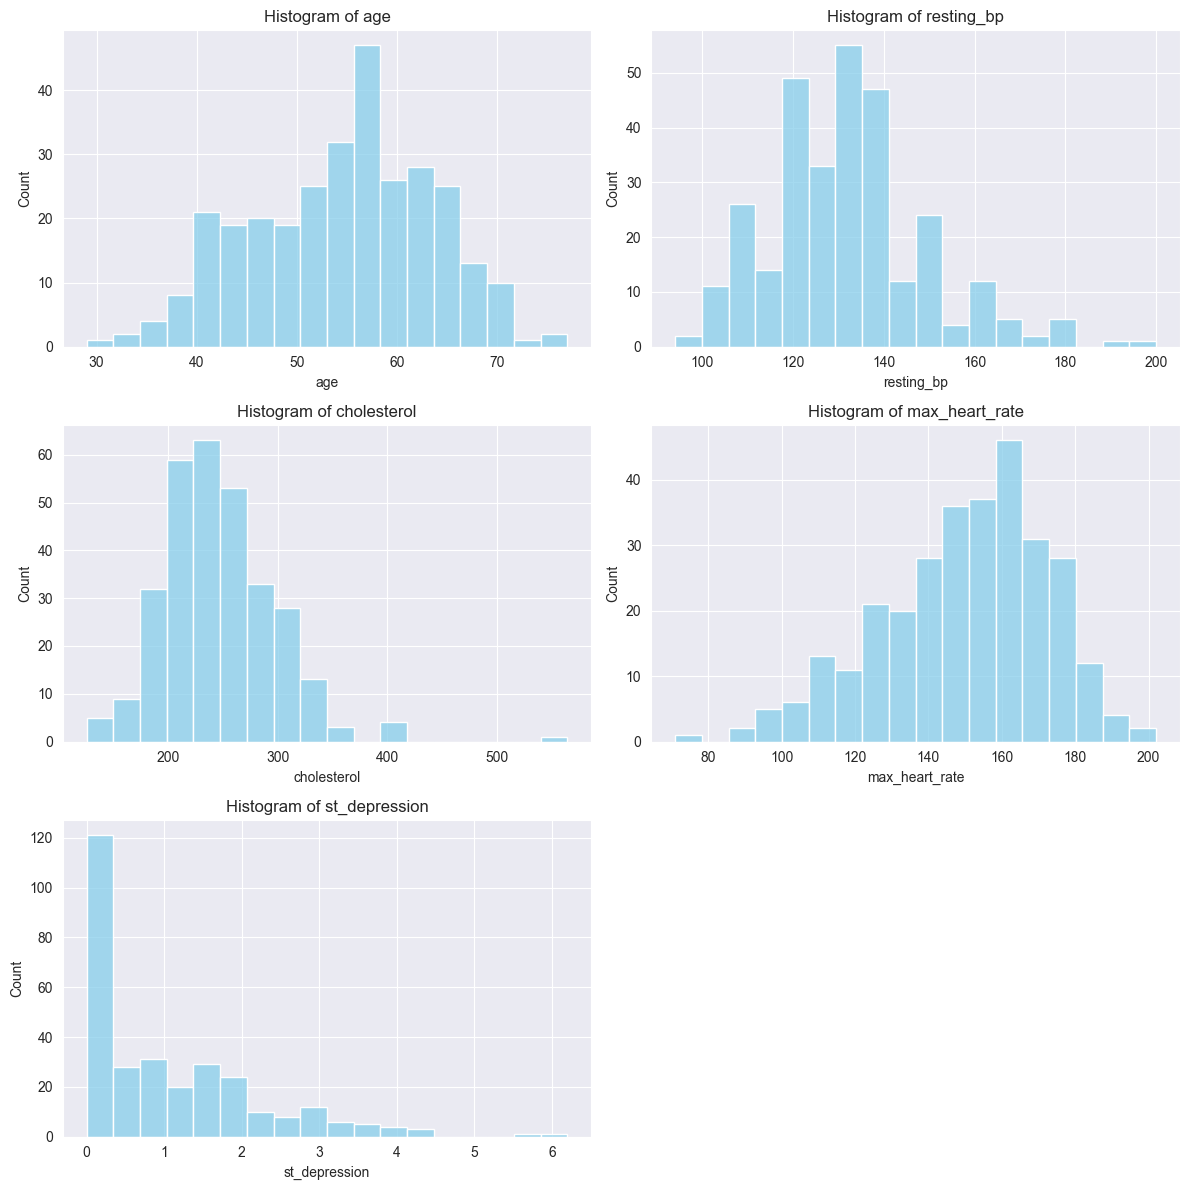

In [9]:
n_cols = 2
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(data=data, x=col, kde=False, ax=axes[i], color='skyblue', bins=18)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

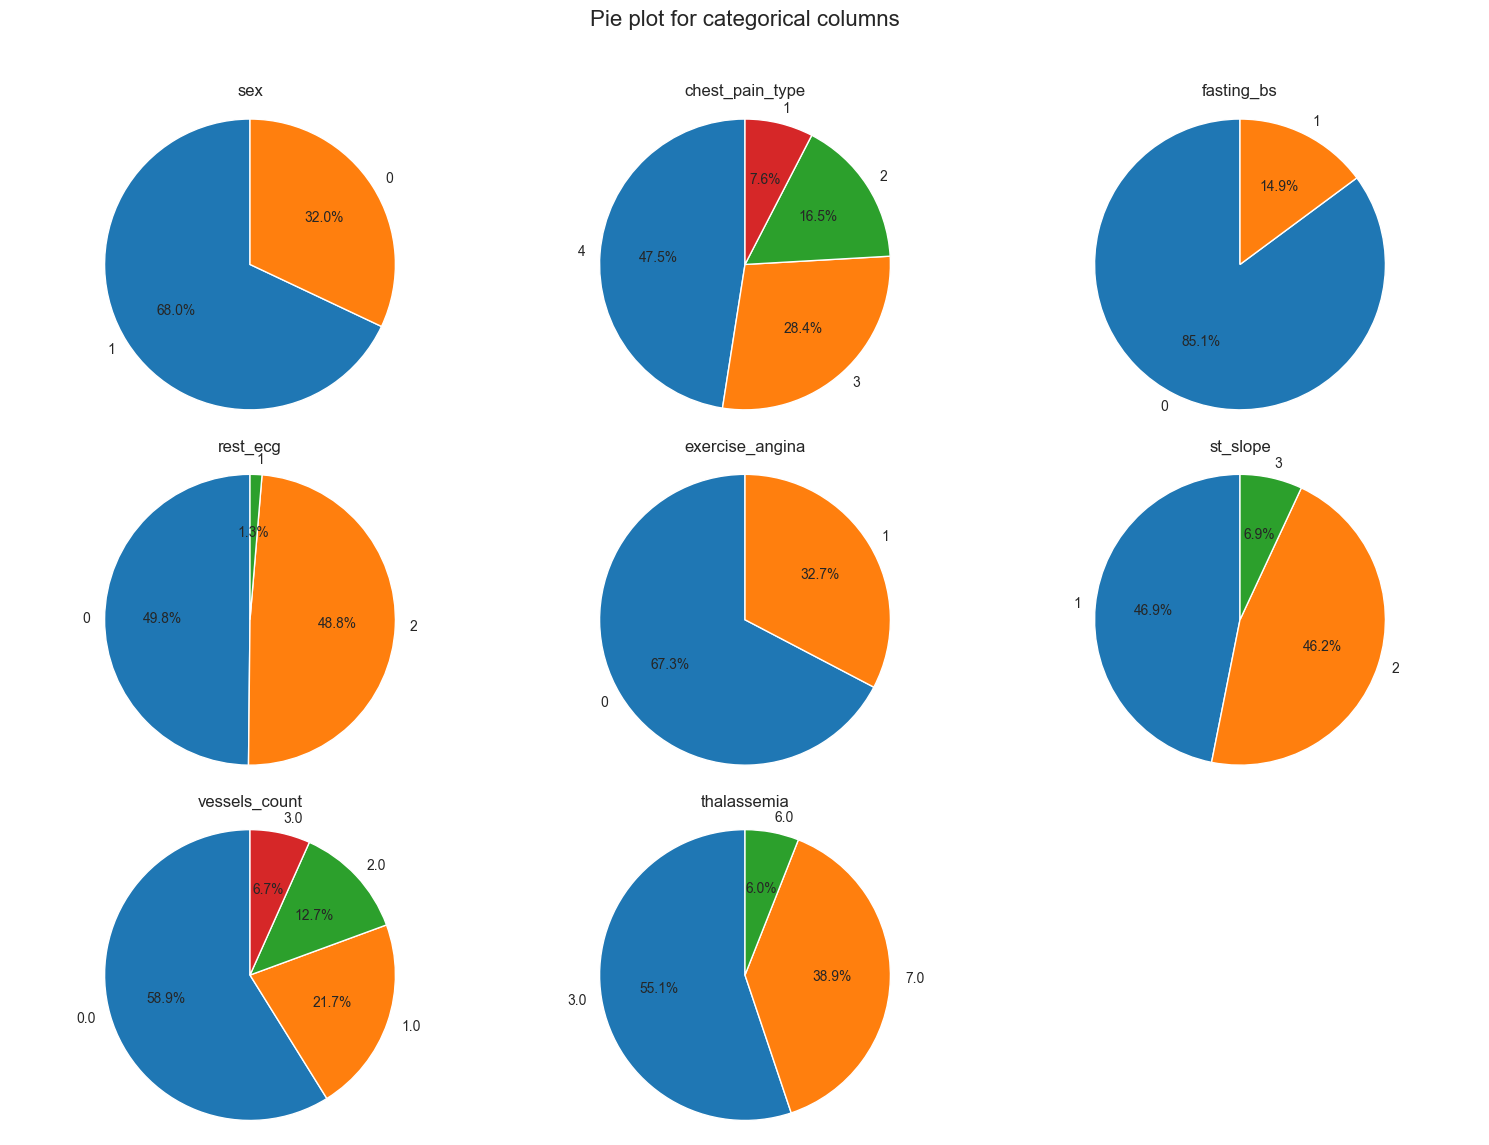

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

fig.suptitle('Pie plot for categorical columns', fontsize=16, y=0.95)

for i, col in enumerate(categorical_cols):
    counts = data[col].value_counts()
    labels = counts.index.astype(str)
    sizes = counts.values

    axes[i].pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    axes[i].set_title(col)
    axes[i].axis('equal')

fig.delaxes(axes[-1])
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### Bivariate analises
It's time to look at relations between the data. We will start from computing correlations.
Categorical variables with an inherent linear order are treated as continuous for the purpose of correlation analysis. We need to be carfull during interpretation correlations with binary values - Pearson coefficient can be inflated.

In [11]:
all_cols = data.columns.tolist()

binary = [col for col in all_cols if data[col].dropna().nunique() == 2]
continuous = [col for col in all_cols if col not in binary]
print("Binary variables: ",binary)
print("Continuous variables (to be check): ",continuous)

Binary variables:  ['sex', 'fasting_bs', 'exercise_angina']
Continuous variables (to be check):  ['age', 'chest_pain_type', 'resting_bp', 'cholesterol', 'rest_ecg', 'max_heart_rate', 'st_depression', 'st_slope', 'vessels_count', 'thalassemia', 'heart_disease']


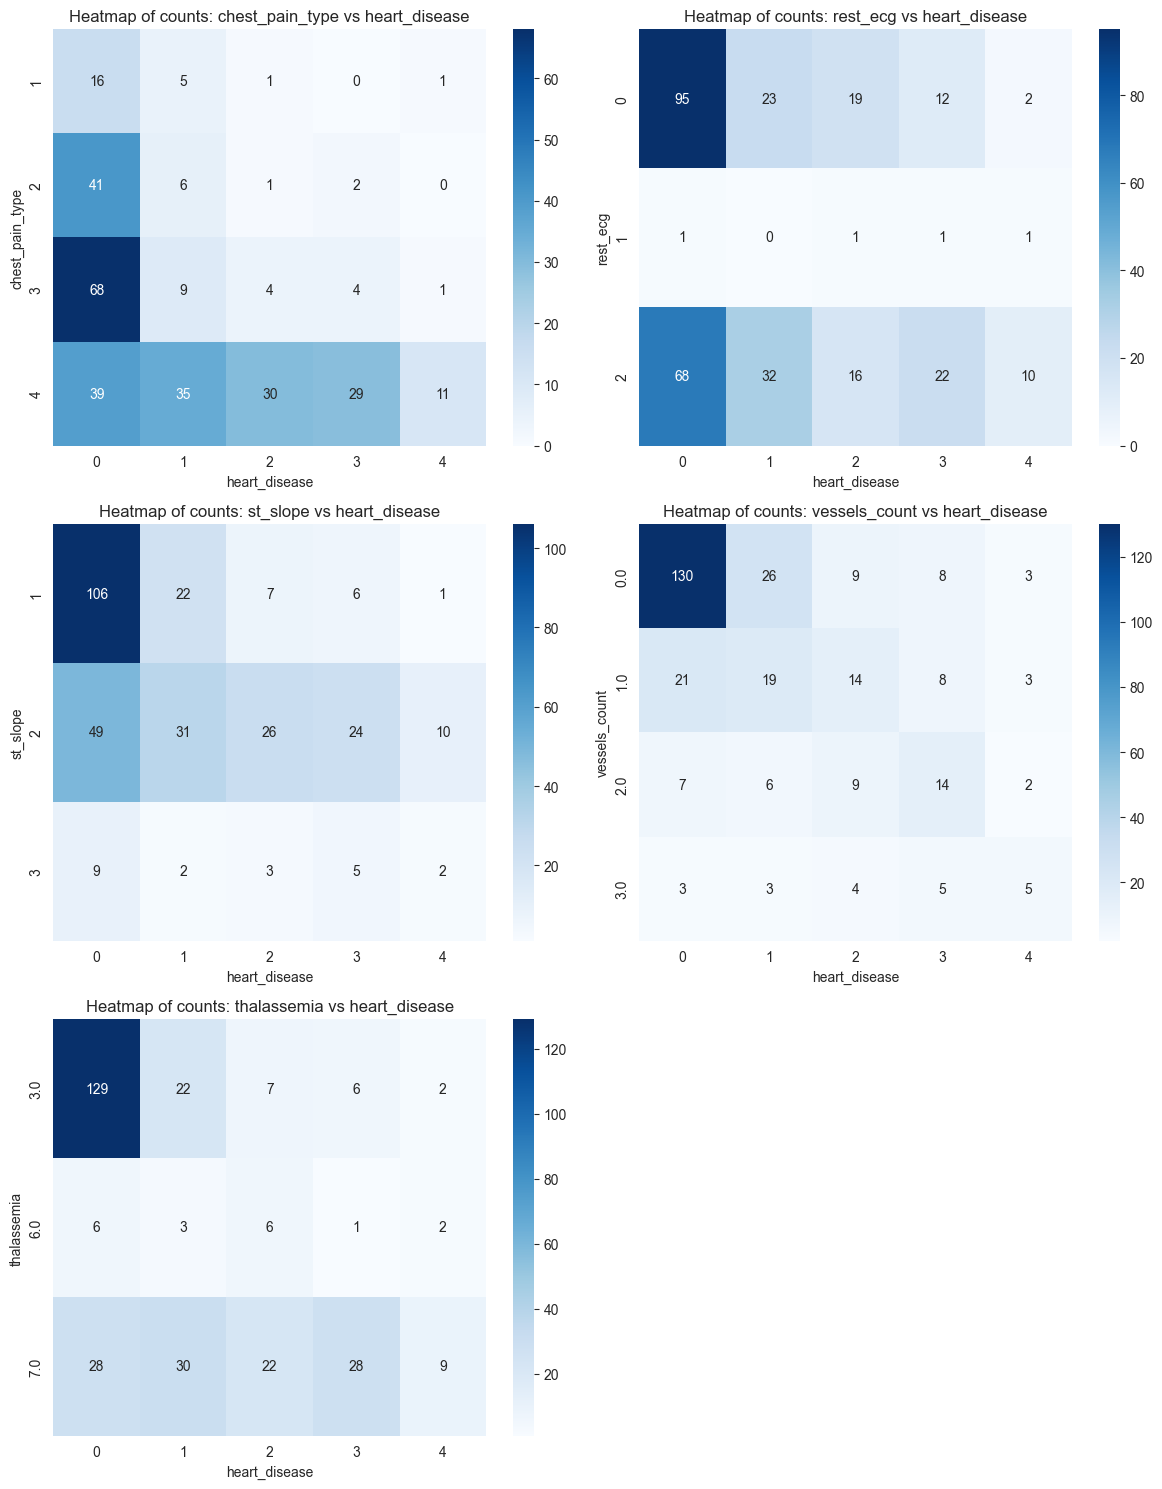

In [12]:
#Checking if we can assume linear order in categorical variables or OHE is needed

target = 'heart_disease'

cols_to_plot = [col for col in continuous if col in categorical_cols]

n = len(cols_to_plot)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for i, cont_col in enumerate(cols_to_plot):
    cross_tab_counts = pd.crosstab(data[cont_col], data[target])
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Heatmap of counts: {cont_col} vs {target}')
    axes[i].set_ylabel(cont_col)
    axes[i].set_xlabel(target)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As we can see, there is a problem with linearity of `rest_ecg` and `thalassemia`. It can be a sugestion to try One Hot Encoding approach.

In [13]:
col_to_ohe = ['restecg','thal']
col_to_ohe = [rename_dict[col] for col in col_to_ohe]

ohe_values = {k: data[k].dropna().unique().tolist() for k in col_to_ohe}
print(ohe_values)

for col in col_to_ohe:
    for i in ohe_values[col]:
        data[f'{col}_{int(i)}'] = data[col].map(lambda x: 1 if x == i else (0 if pd.notna(x) else np.nan))
display(data.sample(5))

{'rest_ecg': [2, 0, 1], 'thalassemia': [6.0, 3.0, 7.0]}


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,vessels_count,thalassemia,heart_disease,rest_ecg_2,rest_ecg_0,rest_ecg_1,thalassemia_6,thalassemia_3,thalassemia_7
10,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,0,1,0,1.0,0.0,0.0
252,64,1,4,128,263,0,0,105,1,0.2,2,1.0,7.0,0,0,1,0,0.0,0.0,1.0
133,51,1,4,140,261,0,2,186,1,0.0,1,0.0,3.0,0,1,0,0,0.0,1.0,0.0
90,66,1,4,120,302,0,2,151,0,0.4,2,0.0,3.0,0,1,0,0,0.0,1.0,0.0
275,64,1,1,170,227,0,2,155,0,0.6,2,0.0,7.0,0,1,0,0,0.0,0.0,1.0


Actual computation of correlations.

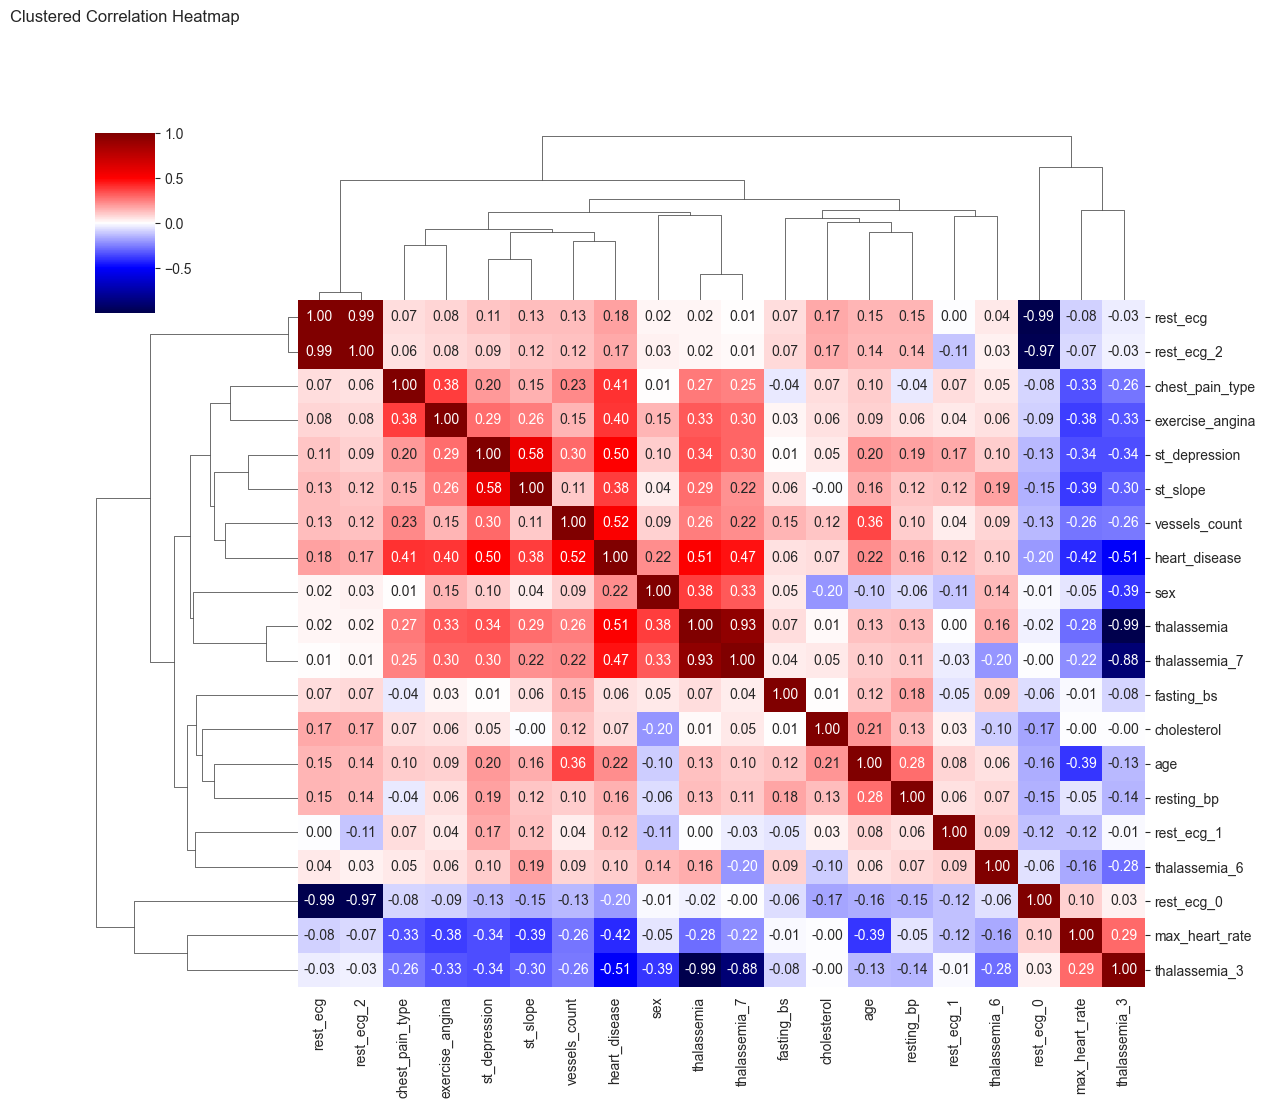

In [15]:
corr = data.corr()
sns.clustermap(corr, cmap='seismic', annot=True, fmt='.2f', figsize=(12, 10))
plt.title('Clustered Correlation Heatmap', pad=80)
plt.show()

From first look we can see that there are **a lot of correlated columns**. So we have to kinds of news here: good and bad. Good news is that we have data **strongly correlated with target** (`vessels_count`, `thallassemia`, `st_depression` with absolute value of correlation at level 0.5). Bad news is that the dependent variables are also significantly correlated with each other, which means it’s easy to **overfit the model**. Therefore, the topic of correlations will be investigated in more detail in the next script; now we will focus on associations between columns and the target.

In [25]:
print("Absolute value of correlation between columns and the target:\n")
print(corr['heart_disease'].abs().sort_values(ascending = False))

Absolute value of correlation between columns and the target:

heart_disease      1.000000
vessels_count      0.518909
thalassemia        0.509923
thalassemia_3      0.508794
st_depression      0.504092
thalassemia_7      0.468399
max_heart_rate     0.415040
chest_pain_type    0.407075
exercise_angina    0.397057
st_slope           0.377957
sex                0.224469
age                0.222853
rest_ecg_0         0.196601
rest_ecg           0.183696
rest_ecg_2         0.168387
resting_bp         0.157754
rest_ecg_1         0.123792
thalassemia_6      0.104253
cholesterol        0.070909
fasting_bs         0.059186
Name: heart_disease, dtype: float64


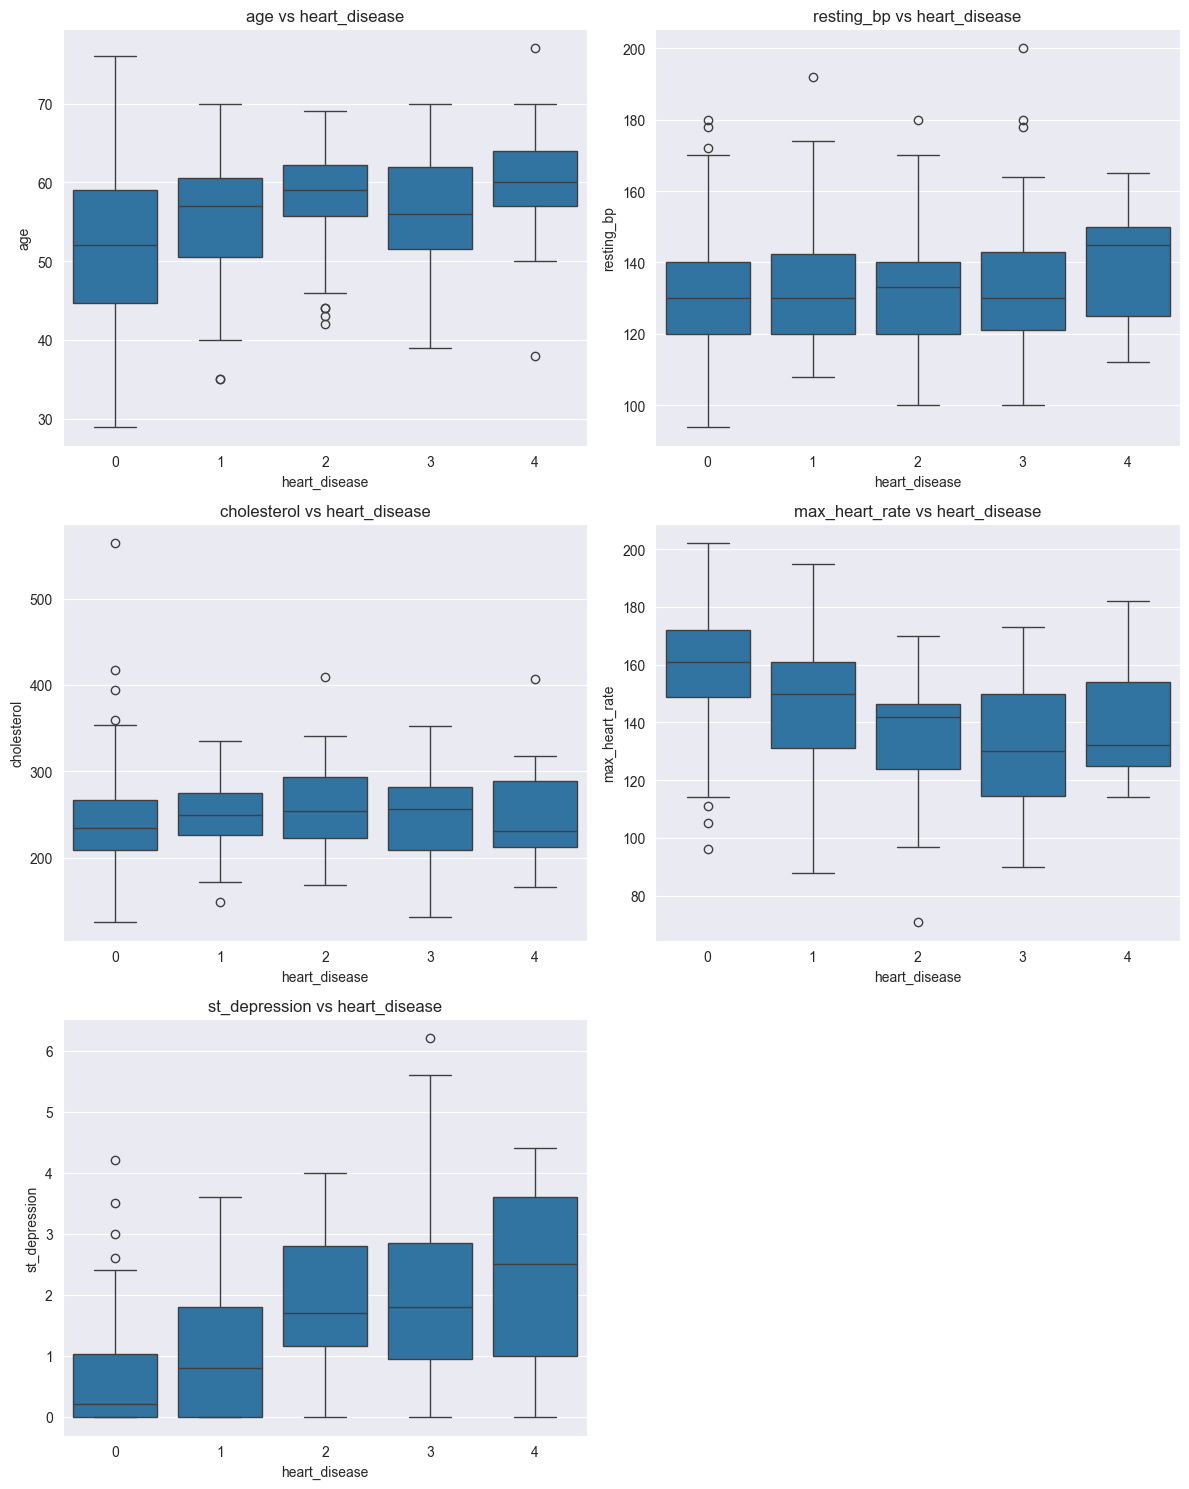

In [30]:
cols_to_plot = [col for col in continuous_cols]

n = len(cols_to_plot)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    cross_tab_counts = pd.crosstab(data[cont_col], data[target])
    sns.boxplot(data, y = col, x = target, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel(target)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From boxplots we can see that `std_depression` and `max_heart_rate` are strong predictors; age is important covariate. Therefore remains only to analyze the dependencies of binary and categorical variables with the target.


In [31]:
binary = [col for col in data.columns if data[col].dropna().nunique() == 2]

print("Binary columns:", binary)

Binary columns: ['sex', 'fasting_bs', 'exercise_angina', 'rest_ecg_2', 'rest_ecg_0', 'rest_ecg_1', 'thalassemia_6', 'thalassemia_3', 'thalassemia_7']


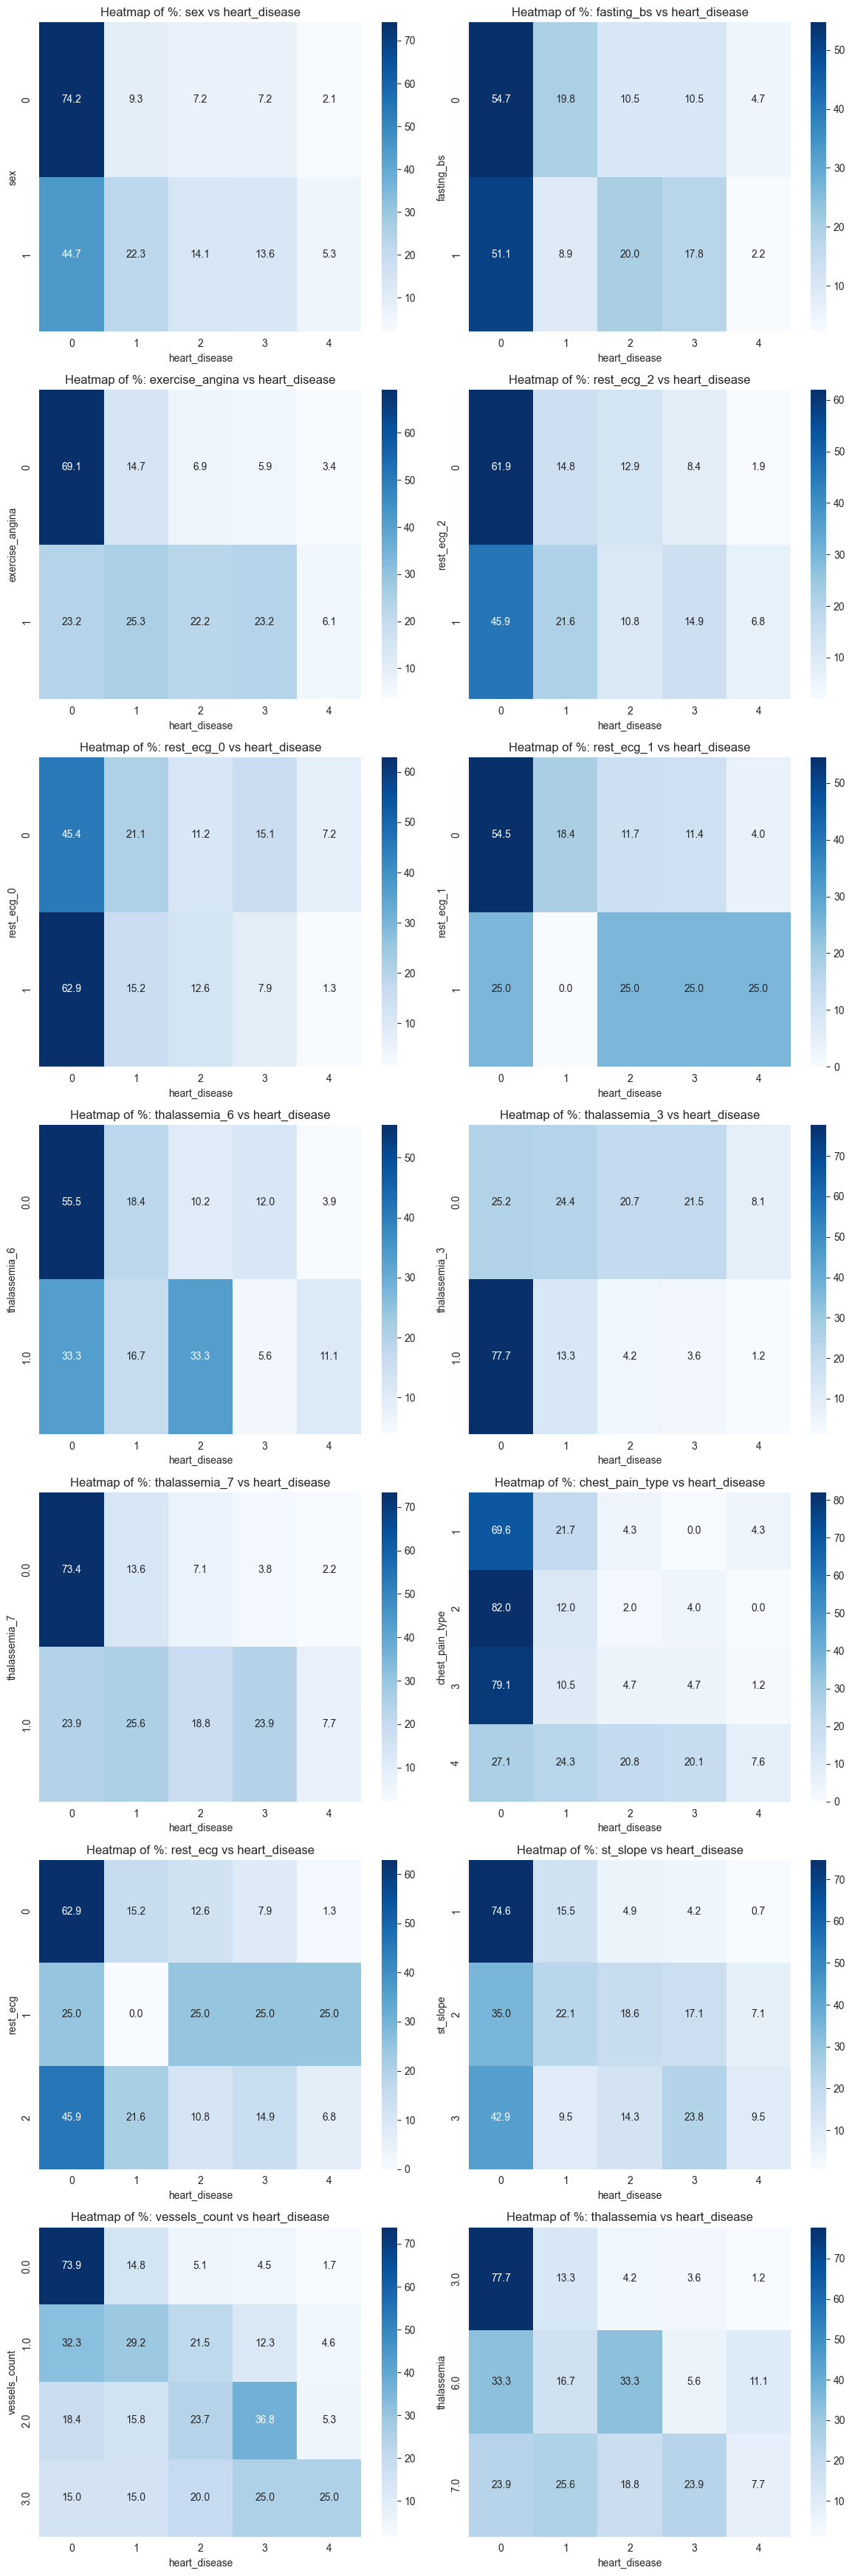

In [35]:
cols_to_plot = binary + [col for col in continuous if col in categorical_cols]

n = len(cols_to_plot)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for i, cont_col in enumerate(cols_to_plot):
    cross_tab_counts = pd.crosstab(data[cont_col], data[target])
    
    cross_tab_perc = cross_tab_counts.div(cross_tab_counts.sum(axis=1), axis=0) * 100
    
    sns.heatmap(cross_tab_perc, annot=True, fmt='.1f', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Heatmap of %: {cont_col} vs {target}')
    axes[i].set_ylabel(cont_col)
    axes[i].set_xlabel(target)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

,diff_%_0,diff_%_1,diff_%_2,diff_%_3,diff_%_4,avg_diff
column,,,,,,
thalassemia_3,52.525658,11.191432,16.523873,17.867024,6.943329,21.010263
thalassemia_7,49.437941,12.054069,11.738201,20.127276,5.518395,19.775177
rest_ecg_1,29.515050,18.394649,13.294314,13.628763,20.986622,19.163880
exercise_angina,45.885324,10.546643,15.359477,17.349970,2.629234,18.354130
thalassemia_6,22.143698,1.707892,23.085984,6.458579,7.224185,12.124068
sex,29.566610,13.051747,6.861175,6.375738,3.277950,11.826644
rest_ecg_0,17.519170,5.820843,1.398571,7.184559,5.912339,7.567097
rest_ecg_2,15.989538,6.782912,2.092415,6.477768,4.821273,7.232781
fasting_bs,3.540052,10.878553,9.534884,7.312661,2.428941,6.739018


<Axes: >

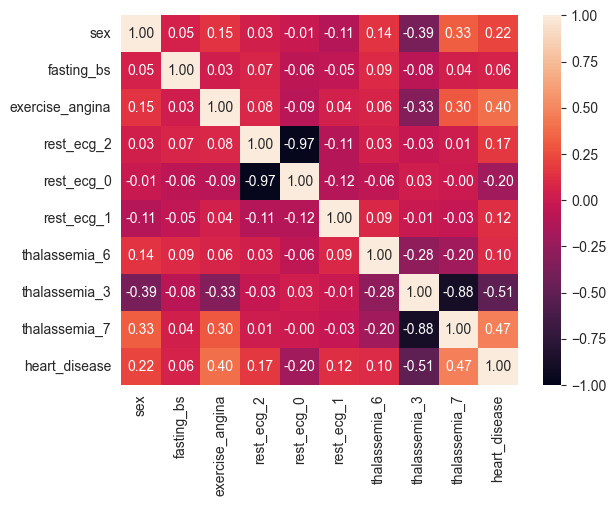

In [44]:
all_diffs = {}

for target_class in range(5):
    diffs = []
    
    for col in binary:
        cross_tab_counts = pd.crosstab(data[col], data[target])
        cross_tab_perc = cross_tab_counts.div(cross_tab_counts.sum(axis=1), axis=0) * 100
        
        if target_class in cross_tab_perc.columns:
            diff = abs(cross_tab_perc.loc[cross_tab_perc.index.max(), target_class] -
                       cross_tab_perc.loc[cross_tab_perc.index.min(), target_class])
            diffs.append((col, diff))
    
    diffs_df = pd.DataFrame(diffs, columns=['column', f'diff_%_{target_class}'])
    diffs_df.set_index('column', inplace=True)
    
    all_diffs[f'diff_%_{target_class}'] = diffs_df[f'diff_%_{target_class}']

final_df = pd.concat(all_diffs.values(), axis=1)
final_df.columns = all_diffs.keys()

final_df['avg_diff'] = final_df.mean(axis=1)
final_df = final_df.sort_values('avg_diff', ascending=False)

display(final_df)
    
sns.heatmap(data[binary+[target]].corr(),vmin=-1,vmax=1,annot=True, fmt='.2f')

The features that most differentiate the level of advancement of heart disease are:
- thalassemia (it's medical event related to cardiovascular system, so probably cannot be treated entirely as an explanatory variable)
- rest_ecg_1
- excercise_angina

What is interesting, rest_ecg_1 doesn't show as strong linear relationship as other variables that significantly differentiate the target value, so probably influence of information from this variable will be more visible in non-linear models.

